**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups
#fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
from scipy.spatial.distance import cdist
from sklearn.neighbors import KDTree
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

In [3]:
class MyKNeighborsClassifier(BaseEstimator):
    #__n
    #__myData
    #__myTarget
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean', standardize=False):
        self.n = n_neighbors
        self.alg = algorithm
        self.myData = []
        self.myMetric = metric
        self.standardize = standardize
    
    def fit(self, X, y):
        tempX = X
        if(self.standardize):
            scaler = StandardScaler(with_mean=False)
            scaler.fit(tempX)
            tempX = scaler.transform(tempX)


        if(self.alg == 'brute'):
            self.myData = tempX
            self.myTarget = y
        if(self.alg == 'kd_tree'):
            self.myData = KDTree(tempX)
            #sklearn.neighbors.
            self.myTarget = y
    
    def predict(self, X):
        tempX = X
        if(self.standardize):
            scaler = StandardScaler(with_mean=False)
            scaler.fit(tempX)
            temp = scaler.transform(tempX)


        if(self.alg == 'brute'):
            distances = pairwise_distances(tempX, self.myData, metric=self.myMetric)
            neighboursInd = np.argpartition(distances, kth=self.n, axis=1)[:,0:self.n:]
            neighboursVal = [];
            for i in neighboursInd:
                neighboursVal.append(self.myTarget[i])
            return np.apply_along_axis(lambda r: np.bincount(r).argmax(), 1, neighboursVal)
        
        if(self.alg == 'kd_tree'):
            neighboursInd = self.myData.query(X, k=self.n, return_distance=False)
            neighboursVal = [];
            for i in neighboursInd:
                neighboursVal.append(self.myTarget[i])
            return np.apply_along_axis(lambda r: np.bincount(r).argmax(), 1, neighboursVal)


**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [9]:
%time clf.fit(X_train, y_train)

CPU times: user 679 µs, sys: 153 µs, total: 832 µs
Wall time: 662 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [10]:
%time my_clf.fit(X_train, y_train)

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 13.4 µs


In [11]:
%time clf.predict(X_test)

CPU times: user 2.54 ms, sys: 119 µs, total: 2.66 ms
Wall time: 3.21 ms


array([1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2])

In [12]:
%time my_clf.predict(X_test)

CPU times: user 888 µs, sys: 0 ns, total: 888 µs
Wall time: 896 µs


array([1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

CPU times: user 1.11 ms, sys: 24 µs, total: 1.14 ms
Wall time: 5.06 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [16]:
%time my_clf.fit(X_train, y_train)

CPU times: user 219 µs, sys: 49 µs, total: 268 µs
Wall time: 261 µs


In [17]:
%time clf.predict(X_test)

CPU times: user 2.26 ms, sys: 55 µs, total: 2.31 ms
Wall time: 2.56 ms


array([2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 0])

In [18]:
%time my_clf.predict(X_test)

CPU times: user 727 µs, sys: 0 ns, total: 727 µs
Wall time: 952 µs


array([2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 0])

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
vectorizer = CountVectorizer(max_df=0.2)
dataMatr = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [24]:
from sklearn.model_selection import KFold

In [25]:
kf = KFold(n_splits=3)

In [26]:
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute', standardize=True)
for train_index, test_index in kf.split(dataMatr):
    my_clf.fit(dataMatr[train_index], target[train_index])
    print(accuracy_score(target[test_index], my_clf.predict(dataMatr[test_index])))

0.05514316012725345
0.05807478122513922
0.05303632988597189


Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [27]:
#optimizeK возвращает оптимальное число соседей в заданном диапазоне
def optimizeK(X, y, maxK=5, minK=1, metric='euclidean', standardize=False):
    kf = KFold(n_splits=3)
    meanAccuracy = []

    for k in range(minK, maxK):
        my_clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute', metric=metric, standardize=standardize)
        tempAccuracy = []
        kfSplit = kf.split(dataMatr)
        for train_index, test_index in kfSplit:
            my_clf.fit(X[train_index], y[train_index])
            tempAccuracy.append(accuracy_score(y[test_index], my_clf.predict(X[test_index])))
        meanAccuracy.append(np.asarray(tempAccuracy).mean())
    print('max accuracy = ', np.asarray(meanAccuracy).max())
    return (np.asarray(meanAccuracy)).argmax() + 1


def meanAccuracyForK(X, y, k, metric='euclidean', standardize=False):
    kf = KFold(n_splits=3)
    my_clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute', metric=metric, standardize=standardize)
    tempAccuracy = []
    kfSplit = kf.split(dataMatr)

    for train_index, test_index in kfSplit:
        my_clf.fit(X[train_index], y[train_index])
        tempAccuracy.append(accuracy_score(y[test_index], my_clf.predict(X[test_index])))

    return np.asarray(tempAccuracy).mean()

In [28]:
print('optimal number of neighbours = ', optimizeK(dataMatr, target, 5, standardize=True))

max accuracy =  0.05966064529034485
optimal number of neighbours =  1


<BarContainer object of 19 artists>

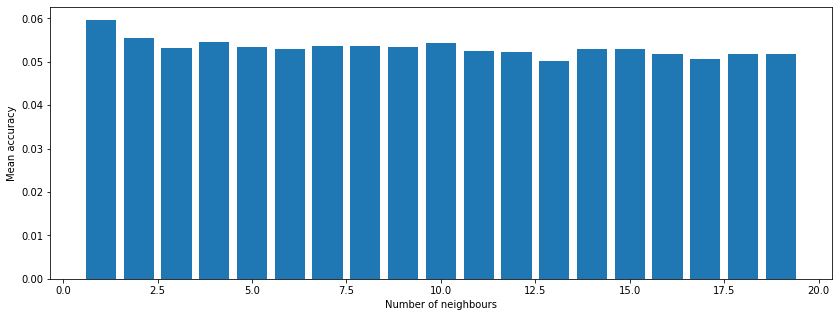

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (14,5))
ax = fig.add_subplot(111)
ax.set_ylabel("Mean accuracy")
ax.set_xlabel("Number of neighbours")
plt.bar(range(1, 20), [meanAccuracyForK(dataMatr, target, i, standardize=True) for i in range(1, 20)])

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

<BarContainer object of 20 artists>

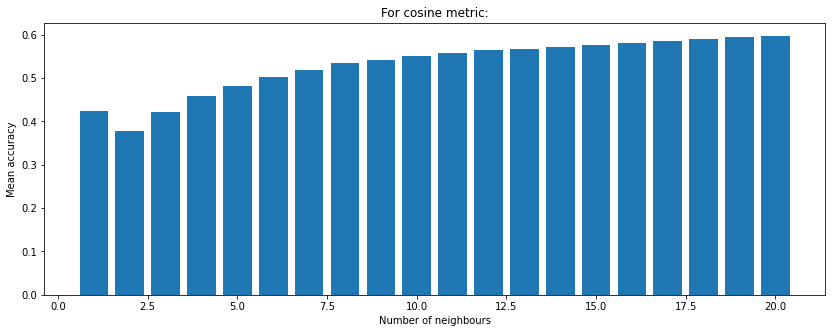

In [30]:
fig = plt.figure(figsize= (14,5))
res = [meanAccuracyForK(dataMatr, target, i, metric='cosine', standardize=True) for i in range(1, 21)]
ax = fig.add_subplot(111)
ax.set_title("For cosine metric:")
ax.set_ylabel("Mean accuracy")
ax.set_xlabel("Number of neighbours")
plt.bar(range(1, 21), res)

optimal number of neighbours =  60


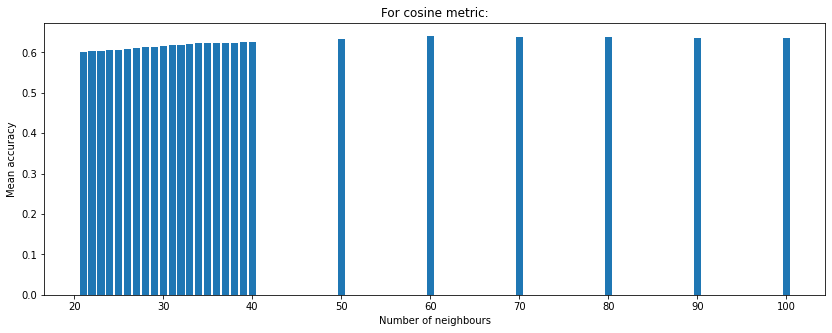

In [31]:
fig = plt.figure(figsize= (14,5))
res = [meanAccuracyForK(dataMatr, target, i, metric='cosine', standardize=True) if i <= 40 or i % 10 == 0 else 0 for i in range(21, 101)]
ax = fig.add_subplot(111)
ax.set_title("For cosine metric:")
ax.set_ylabel("Mean accuracy")
ax.set_xlabel("Number of neighbours")
plt.bar(range(21, 101), res)
print('optimal number of neighbours = ', np.asarray(res).argmax() + 21)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
vectorizer = TfidfVectorizer(max_df=0.2)
dataMatr = vectorizer.fit_transform(data)
vocab = vectorizer.vocabulary_

<BarContainer object of 9 artists>

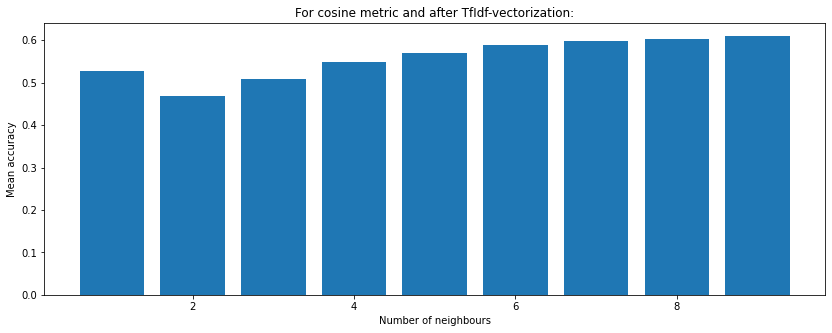

In [34]:
fig = plt.figure(figsize= (14,5))
res = [meanAccuracyForK(dataMatr, target, i, metric='cosine', standardize=True) for i in range(1, 10)]
ax = fig.add_subplot(111)
ax.set_title("For cosine metric and after TfIdf-vectorization:")
ax.set_ylabel("Mean accuracy")
ax.set_xlabel("Number of neighbours")
plt.bar(range(1, 10), res)

optimal number of neighbours =  70


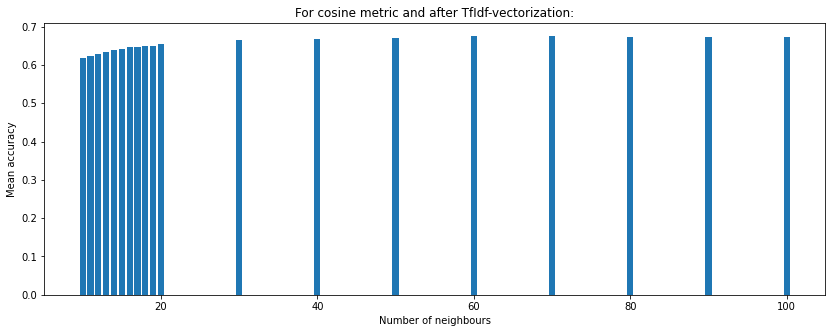

In [35]:
fig = plt.figure(figsize= (14,5))
res = [meanAccuracyForK(dataMatr, target, i, metric='cosine', standardize=True) if i <= 20 or i % 10 == 0 else 0 for i in range(10, 101)]
ax = fig.add_subplot(111)
ax.set_title("For cosine metric and after TfIdf-vectorization:")
ax.set_ylabel("Mean accuracy")
ax.set_xlabel("Number of neighbours")
plt.bar(range(10, 101), res)
print('optimal number of neighbours = ', np.asarray(res).argmax() + 10)

In [36]:
optimizeK(dataMatr, target, 71, minK=70, metric='cosine', standardize=True)

max accuracy =  0.6755355117973026


1

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [37]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
testData = newsgroups['data']
testTarget = newsgroups['target']

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [38]:
my_clf = MyKNeighborsClassifier(n_neighbors=70, algorithm='brute', metric='cosine', standardize=True)
my_clf.fit(dataMatr, target)
vectorizer = TfidfVectorizer(max_df=0.2, vocabulary=vocab)
testDataMatr = vectorizer.fit_transform(testData)
print(accuracy_score(testTarget, my_clf.predict(testDataMatr)))

0.6370154009559214


In [39]:
#Вывод: качество слабо отличается от кросс-валидации. Оно немного упало. Возможно, связано с тем, что появились новые слова, которые в старом словаре не учитываются